In [ ]:
!pip install fastbook;

In [5]:
from fastai.vision.all import *
from fastbook import *
import torch

In [6]:
path = untar_data(URLs.MNIST_SAMPLE); path

Path('/root/.fastai/data/mnist_sample')

In [7]:
paths_train_3 = (path/'train/3').ls(); paths_train_3

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/43816.png'),Path('/root/.fastai/data/mnist_sample/train/3/19326.png'),Path('/root/.fastai/data/mnist_sample/train/3/9553.png'),Path('/root/.fastai/data/mnist_sample/train/3/57194.png'),Path('/root/.fastai/data/mnist_sample/train/3/5858.png'),Path('/root/.fastai/data/mnist_sample/train/3/18453.png'),Path('/root/.fastai/data/mnist_sample/train/3/52740.png'),Path('/root/.fastai/data/mnist_sample/train/3/52590.png'),Path('/root/.fastai/data/mnist_sample/train/3/43637.png'),Path('/root/.fastai/data/mnist_sample/train/3/50995.png')...]

In [8]:
paths_train_7 = (path/'train/7').ls(); paths_train_7

(#6265) [Path('/root/.fastai/data/mnist_sample/train/7/48053.png'),Path('/root/.fastai/data/mnist_sample/train/7/53694.png'),Path('/root/.fastai/data/mnist_sample/train/7/18597.png'),Path('/root/.fastai/data/mnist_sample/train/7/47666.png'),Path('/root/.fastai/data/mnist_sample/train/7/23802.png'),Path('/root/.fastai/data/mnist_sample/train/7/29144.png'),Path('/root/.fastai/data/mnist_sample/train/7/28025.png'),Path('/root/.fastai/data/mnist_sample/train/7/25649.png'),Path('/root/.fastai/data/mnist_sample/train/7/19235.png'),Path('/root/.fastai/data/mnist_sample/train/7/50254.png')...]

In [9]:
len(paths_train_3), len(paths_train_7)

(6131, 6265)

In [10]:
train_3_tnrs = [tensor(Image.open(p)) for p in paths_train_3]; len(train_3_tnrs)

6131

In [11]:
train_7_tnrs = [tensor(Image.open(p)) for p in paths_train_7]; len(train_7_tnrs)

6265

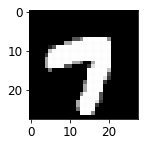

In [12]:
plt.figure(figsize=(2,2))
plt.imshow(train_7_tnrs[0], cmap='gray')

In [13]:
train_7_stack = torch.stack(train_7_tnrs); train_7_stack.shape

torch.Size([6265, 28, 28])

In [14]:
train_3_stack = torch.stack(train_3_tnrs); train_3_stack.shape

torch.Size([6131, 28, 28])

In [15]:
train_3_flat = train_3_stack.flatten(1); train_3_flat.shape

torch.Size([6131, 784])

In [16]:
train_7_flat = train_7_stack.flatten(1); train_7_flat.shape

torch.Size([6265, 784])

In [17]:
x_train = torch.cat([train_3_flat, train_7_flat]); x_train.shape

torch.Size([12396, 784])

In [18]:
x_train = x_train.float(); x_train.shape

torch.Size([12396, 784])

In [19]:
y_train = tensor([1]*len(train_3_tnrs) + [0]*len(train_7_tnrs)).float().unsqueeze(1); y_train.shape

torch.Size([12396, 1])

In [20]:
x_train[0] @ torch.randn(x_train.shape[1], 1)

tensor([-2055.7864])

In [21]:
def init_params(shape): return torch.randn(shape).requires_grad_()

In [38]:
def linear1(xb): return xb@weights + bias

In [23]:
def mnist_loss(preds, trgts):
    preds = preds.sigmoid()
    return torch.where(trgts==1.0, 1 - preds, preds).mean()

In [24]:
dset = list((zip(x_train, y_train))); len(dset)

12396

In [25]:
len(dset[0]), len(dset[1])

(2, 2)

In [26]:
x_train_0, y_train_0 = dset[0]; x_train_0.shape, y_train_0.shape

(torch.Size([784]), torch.Size([1]))

In [27]:
dl = torch.utils.data.DataLoader(dset, batch_size=256)

In [28]:
weights = init_params((28*28, 1)) #Need to decide shape of weights and that has to match the number of pixels in an image
bias = init_params(1)

Lets choose a batch of size 4

In [29]:
batch = x_train[:4]; batch.shape

torch.Size([4, 784])

In [30]:
preds = linear1(batch, weights, bias); preds

tensor([[-1700.4531],
        [-2528.4622],
        [-1256.9717],
        [-1475.4575]], grad_fn=<AddBackward0>)

In [31]:
loss = mnist_loss(preds, y_train[:4])
loss

tensor(1., grad_fn=<MeanBackward0>)

In [32]:
loss.backward()

In [34]:
weights.grad.shape, bias.grad

(torch.Size([784, 1]), tensor([0.]))

In [35]:
def calc_gradient(xb, yb, model, loss_f):
    preds = model(xb)
    loss_f(preds, yb).backward()

In [36]:
weights.grad = None; bias.grad = None

In [39]:
calc_gradient(batch, y_train[:4], linear1, mnist_loss)

In [40]:
weights.grad.shape, bias.grad

(torch.Size([784, 1]), tensor([0.]))

In [41]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

> Functions that modify a tensor inplace has _ in the end

In [57]:
y = tensor([1, 0, 0, 1, 1]).float(); y

tensor([1., 0., 0., 1., 1.])

In [58]:
preds = tensor([0.7, 0.6, 0.2, 0.9, 0.1]); preds

tensor([0.7000, 0.6000, 0.2000, 0.9000, 0.1000])

In [59]:
torch.where(y == 1.0, preds > 0.5, preds <=0.5).float().mean()

tensor(0.6000)

In [70]:
valid_3_stack = torch.stack([tensor(Image.open(p)) for p in (path/'valid/3').ls()]); valid_3_stack.shape

torch.Size([1010, 28, 28])

In [71]:
valid_7_stack = torch.stack([tensor(Image.open(p)) for p in (path/'valid/7').ls()]); valid_7_stack.shape

torch.Size([1028, 28, 28])

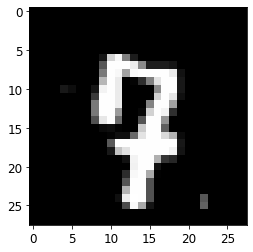

In [73]:
plt.imshow(valid_7_stack[0], cmap='gray')

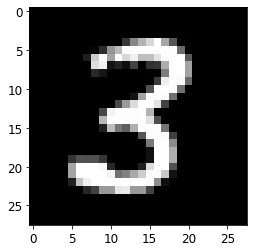

In [74]:
plt.imshow(valid_3_stack[0], cmap='gray')

In [75]:
valid_3_flat = valid_3_stack.flatten(1); valid_3_flat.shape

torch.Size([1010, 784])

In [76]:
valid_7_flat = valid_7_stack.flatten(1); valid_7_flat.shape

torch.Size([1028, 784])

In [77]:
valid_x = torch.cat([valid_3_flat, valid_7_flat]); valid_x.shape

torch.Size([2038, 784])

In [82]:
valid_y = tensor([1]*len(valid_3_flat) + [0]*len(valid_7_flat)).float().unsqueeze(1); valid_y.shape

torch.Size([2038, 1])

In [83]:
valid_dset = list(zip(valid_x, valid_y))

In [87]:
valid_dl = torch.utils.data.DataLoader(valid_dset, batch_size=256)

In [89]:
len(valid_dl)

8